# PROBLEM

## Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor

* Bir departman bir konuda eğitim talep ediyor.
* Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor
* Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
* Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

In [2]:
import pandas as pd
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
                121,118,124,121,125,115,115,119,118,121,117,117,120,120,
               121,117,118,117,123,118,124,121,115,118,125,115])
   
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
                 134,134,124,140,134,129,129,138,134,124,122,126,133,127,
                130,130,130,132,117,130,125,129,133,120,127,123])
   

In [4]:
oncesi[:4]

,0
0,123
1,119
2,119
3,116


In [6]:
sonrasi[:4]

,0
0,118
1,127
2,122
3,132


In [8]:
#veri seti ayrık
ayrik=pd.concat([oncesi,sonrasi],axis=1)
ayrik.columns=["oncesi","sonrasi"]
ayrik.head()

,oncesi,sonrasi
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [10]:
#veri seti birleşik
import numpy as np

grup_oncesi=np.arange(len(oncesi))
grup_oncesi=pd.DataFrame(grup_oncesi)
grup_oncesi[:]="oncesi"

a=pd.concat([oncesi,grup_oncesi],axis=1)




In [11]:
grup_sonrasi=np.arange(len(sonrasi))
grup_sonrasi=pd.DataFrame(grup_sonrasi)
grup_sonrasi[:]="sonrasi"

b=pd.concat([sonrasi,grup_sonrasi],axis=1)

In [13]:
birlikte=pd.concat([a,b])
birlikte.columns=["performans","oncesi_sonrasi"]
birlikte

,performans,oncesi_sonrasi
0,123,oncesi
1,119,oncesi
2,119,oncesi
3,116,oncesi
4,123,oncesi
...,...,...
35,129,sonrasi
36,133,sonrasi
37,120,sonrasi
38,127,sonrasi


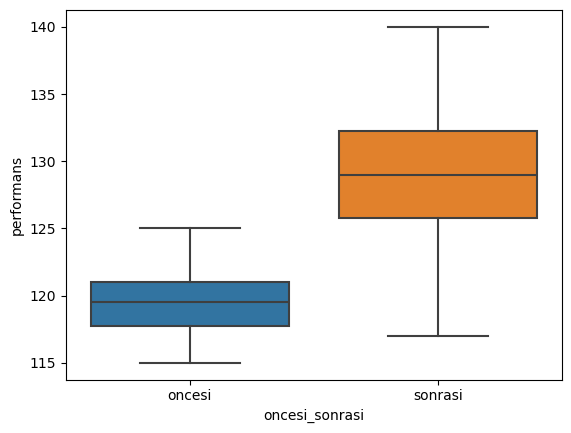

In [14]:
import seaborn as sns
sns.boxplot(x="oncesi_sonrasi",y="performans",data=birlikte);

# Varsayım Kontrolleri
* Normallik 
* Varyans Homojenliği


In [34]:
from scipy.stats import shapiro
from scipy import stats

In [35]:
shapiro(ayrik.oncesi)

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722016543149948)

In [36]:
shapiro(ayrik.sonrasi)

ShapiroResult(statistic=0.9780092239379883, pvalue=0.6159630417823792)

In [37]:
stats.levene(ayrik.oncesi,ayrik.sonrasi)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

varyansların homojenliği sağlanmıyor fakat göz ardı ederek devam edicez.

## Hipotez Testi
* H0: μ1=μ2

* H1: μ1!=μ2

In [38]:
test_istatistigi,pvalue=stats.ttest_rel(ayrik.oncesi,ayrik.sonrasi)

In [39]:
print("Test istatistiği = %.4f \np-value= %.12f" %(test_istatistigi,pvalue))

Test istatistiği = -9.2815 
p-value= 0.000000000020


**H0 hipotezi reddedilir yani eğitim işe yaramıştır.**

## Nonparametrik Bağımlı İki Örneklem Testi

In [45]:
import warnings
warnings.filterwarnings("ignore", message="Exact p-value calculation does not work if there are zeros. Switching to normal approximation.")
istatistic,pvalue_=stats.wilcoxon(ayrik.oncesi,ayrik.sonrasi)

In [46]:
print("Test istatistiği = %.4f \np-value= %.12f" %(istatistic,pvalue_))

Test istatistiği = 15.0000 
p-value= 0.000000249149


**Nonparametrik yaklaşımla da anlamlı bir fark vardır sonucuna varılmıştır.**